# SMS Spam Detection

Import Modules

In [55]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from nltk.corpus import words
from tqdm.notebook import tqdm

Read the dataset into a Pandas DataFrame

In [10]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.drop_duplicates()
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Exploratory Data Analysis

In [40]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


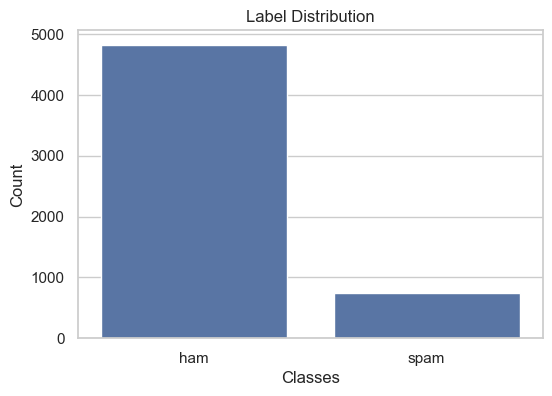

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'binary_column' is the name of your binary column
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

ax = sns.countplot(x = "label", data=df)

# Add labels and title
ax.set_xlabel("Classes")
ax.set_ylabel("Count")
ax.set_title("Label Distribution")

# Show the plot
plt.show()

Feature Engineering

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

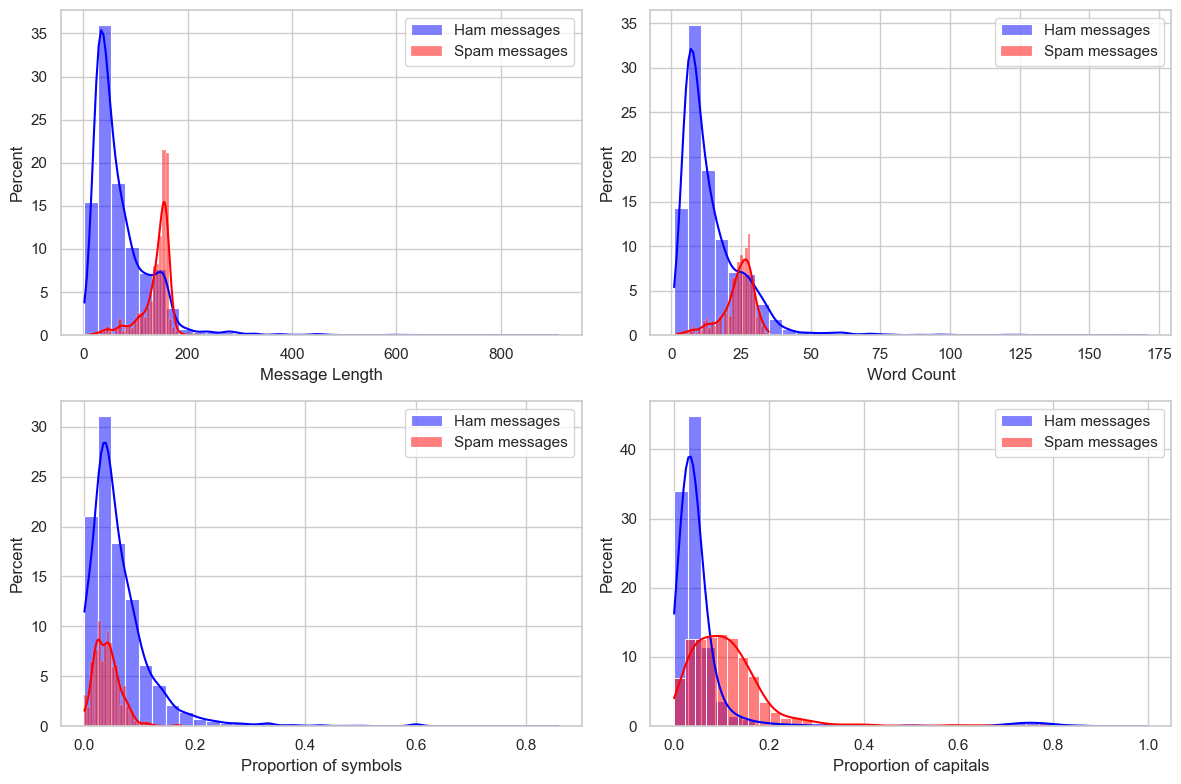

In [12]:
def count_words(text):
    return len(text.split(" "))

def count_symbols(message):
    symbols = set(string.punctuation)
    count = sum(1 for char in message if char in symbols)
    return count / len(message)


def count_capitals(message):
    count = sum(1 for char in message if char.isupper())
    return count / len(message)

# Label into binary column
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# Create new features 
tqdm.pandas(desc='My bar!')
df["length"] = df["message"].progress_apply(len)

tqdm.pandas(desc='My bar!')
df["word_count"] = df["message"].progress_apply(count_words)

tqdm.pandas(desc='My bar!')
df["symbols"] = df["message"].progress_apply(count_symbols)

tqdm.pandas(desc='My bar!')
df["capitals"] = df["message"].progress_apply(count_capitals)


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
ham_data = df[df["label"] == 0]
sns.histplot(ham_data["length"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")
spam_data = df[df["label"] == 1]
sns.histplot(spam_data["length"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")
plt.legend()
plt.xlabel("Message Length")

# Plot 2: Word Count
plt.subplot(2, 2, 2)
ham_data = df[df["label"] == 0]
sns.histplot(ham_data["word_count"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")
spam_data = df[df["label"] == 1]
sns.histplot(spam_data["word_count"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")
plt.legend()
plt.xlabel("Word Count")

# Plot 3: Proportion of Symbols
plt.subplot(2, 2, 3)
ham_data = df[df["label"] == 0]
sns.histplot(ham_data["symbols"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")
spam_data = df[df["label"] == 1]
sns.histplot(spam_data["symbols"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")
plt.legend()
plt.xlabel("Proportion of symbols")

# Plot 4: Proportion of Capitals
plt.subplot(2, 2, 4)
ham_data = df[df["label"] == 0]
sns.histplot(ham_data["capitals"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")
spam_data = df[df["label"] == 1]
sns.histplot(spam_data["capitals"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")
plt.legend()
plt.xlabel("Proportion of capitals")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Testing if spam and ham are distributed differently for each feature

In [13]:
features = [i for i in df.columns if i not in ["label", "message"]]
for feature in features:
    ks_statistic, p_value = ks_2samp(ham_data[feature], spam_data[feature])
    print(f"Kolmogorov-Smirnov Statistic for {feature}:", ks_statistic)
    print("P-Value:", p_value)
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")
    print("--------------------------------------------")

Kolmogorov-Smirnov Statistic for length: 0.6784415728544576
P-Value: 8.17299035435783e-290
The distributions are significantly different.
--------------------------------------------
Kolmogorov-Smirnov Statistic for word_count: 0.594013220411872
P-Value: 1.6806655583102593e-215
The distributions are significantly different.
--------------------------------------------
Kolmogorov-Smirnov Statistic for symbols: 0.21631201836707797
P-Value: 5.046492269780785e-27
The distributions are significantly different.
--------------------------------------------
Kolmogorov-Smirnov Statistic for capitals: 0.5352696450742521
P-Value: 4.415291113781373e-172
The distributions are significantly different.
--------------------------------------------


Remove punctuations

In [14]:
def process_text(message):
    message = "".join([char for char in message if char not in string.punctuation]).lower()
    return message
df["message"] = df["message"].apply(process_text)
df

,label,message,length,word_count,symbols,capitals
0,0,go until jurong point crazy available only in ...,111,20,0.081081,0.027027
1,0,ok lar joking wif u oni,29,6,0.206897,0.068966
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,28,0.038710,0.064516
3,0,u dun say so early hor u c already then say,49,11,0.122449,0.040816
4,0,nah i dont think he goes to usf he lives aroun...,61,13,0.032787,0.032787
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,30,0.049689,0.055901
5568,0,will ì b going to esplanade fr home,37,8,0.054054,0.054054
5569,0,pity was in mood for that soany other suggest...,57,10,0.122807,0.035088
5570,0,the guy did some bitching but i acted like id ...,125,26,0.008000,0.016000


Count frequency of numbers

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

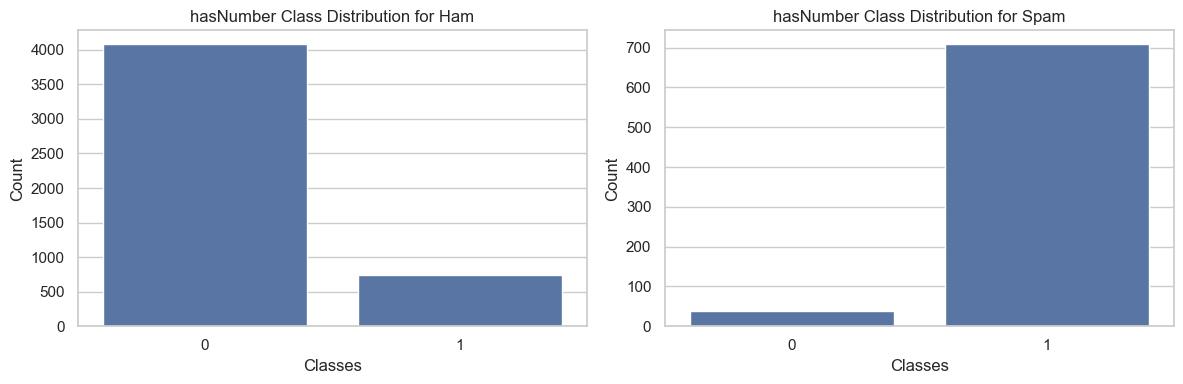

In [15]:
def hasNumber(message):
    letters = [letter for letter in message if letter.isdigit()]
    return 0 if len(letters) == 0 else 1

tqdm.pandas(desc='My bar!')
df['numbers'] = df['message'].progress_apply(hasNumber)

# Set the style
sns.set(style="whitegrid")

# Create a 1x2 subplot layout
plt.figure(figsize=(12, 4))

# Plot for Ham
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="numbers", data=df[df["label"] == 0])
ax1.set_xlabel("Classes")
ax1.set_ylabel("Count")
ax1.set_title("hasNumber Class Distribution for Ham")

# Plot for Spam
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="numbers", data=df[df["label"] == 1])
ax2.set_xlabel("Classes")
ax2.set_ylabel("Count")
ax2.set_title("hasNumber Class Distribution for Spam")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Replace all numbers

In [16]:
def replace_numbers(message):
    #words = message.split()
    processed_words = [letter for letter in message if not letter.isdigit()]
    return ''.join(processed_words)

tqdm.pandas(desc='My bar!')
df['message'] = df['message'].progress_apply(replace_numbers)
df

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers
0,0,go until jurong point crazy available only in ...,111,20,0.081081,0.027027,0
1,0,ok lar joking wif u oni,29,6,0.206897,0.068966,0
2,1,free entry in a wkly comp to win fa cup final...,155,28,0.038710,0.064516,1
3,0,u dun say so early hor u c already then say,49,11,0.122449,0.040816,0
4,0,nah i dont think he goes to usf he lives aroun...,61,13,0.032787,0.032787,0
...,...,...,...,...,...,...,...
5567,1,this is the nd time we have tried contact u u...,161,30,0.049689,0.055901,1
5568,0,will ì b going to esplanade fr home,37,8,0.054054,0.054054,0
5569,0,pity was in mood for that soany other suggest...,57,10,0.122807,0.035088,0
5570,0,the guy did some bitching but i acted like id ...,125,26,0.008000,0.016000,0


Remove all urls and replace with "url"

In [17]:
import re 
def replace_urls(message):
    # Define a regular expression pattern for matching URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Replace URLs with 'url'
    replaced_tokens = ['url' if url_pattern.match(token) else token for token in message.split(" ")]
    
    return ' '.join(replaced_tokens)

tqdm.pandas(desc='My bar!')
df['message'] = df['message'].progress_apply(replace_urls)
df

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers
0,0,go until jurong point crazy available only in ...,111,20,0.081081,0.027027,0
1,0,ok lar joking wif u oni,29,6,0.206897,0.068966,0
2,1,free entry in a wkly comp to win fa cup final...,155,28,0.038710,0.064516,1
3,0,u dun say so early hor u c already then say,49,11,0.122449,0.040816,0
4,0,nah i dont think he goes to usf he lives aroun...,61,13,0.032787,0.032787,0
...,...,...,...,...,...,...,...
5567,1,this is the nd time we have tried contact u u...,161,30,0.049689,0.055901,1
5568,0,will ì b going to esplanade fr home,37,8,0.054054,0.054054,0
5569,0,pity was in mood for that soany other suggest...,57,10,0.122807,0.035088,0
5570,0,the guy did some bitching but i acted like id ...,125,26,0.008000,0.016000,0


Reducing the size of the vocabulary by stemming

In [18]:
from nltk.stem.porter import PorterStemmer

def stemming(text):
    port_stem = PorterStemmer()
    text = [port_stem.stem(word) for word in text.split(" ") if word not in stopwords.words('english')]
    return " ".join(text)

tqdm.pandas(desc='My bar!')
df["message"] = df["message"].progress_apply(stemming)
df

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers
0,0,go jurong point crazi avail bugi n great world...,111,20,0.081081,0.027027,0
1,0,ok lar joke wif u oni,29,6,0.206897,0.068966,0
2,1,free entri wkli comp win fa cup final tkt st ...,155,28,0.038710,0.064516,1
3,0,u dun say earli hor u c alreadi say,49,11,0.122449,0.040816,0
4,0,nah dont think goe usf live around though,61,13,0.032787,0.032787,0
...,...,...,...,...,...,...,...
5567,1,nd time tri contact u u å£ pound prize claim...,161,30,0.049689,0.055901,1
5568,0,ì b go esplanad fr home,37,8,0.054054,0.054054,0
5569,0,piti mood soani suggest,57,10,0.122807,0.035088,0
5570,0,guy bitch act like id interest buy someth els ...,125,26,0.008000,0.016000,0


More feature engineering after pre-processed data

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

Kolmogorov-Smirnov Statistic: 0.4574603769135263
P-Value: 1.692515349820237e-123
The distributions are significantly different.


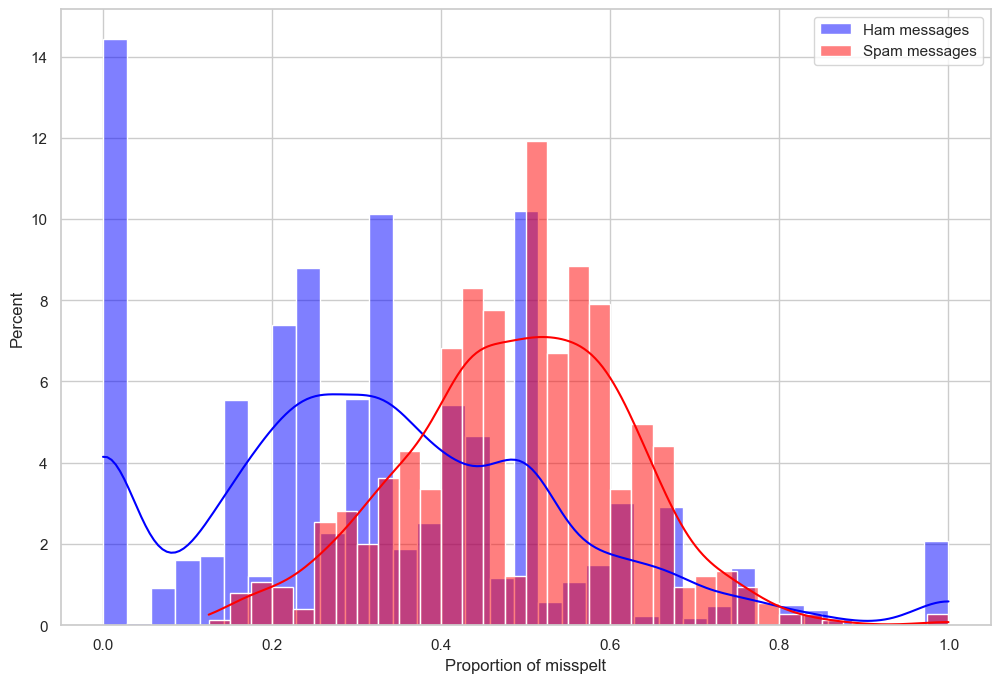

In [19]:
def freq_incorrect(text):
    strings = text.split(" ")
    english_vocab = set(w.lower() for w in words.words())
    misspelled = len([word for word in strings if word not in english_vocab])
    return misspelled / len(strings)

#if "misspelt" not in df.columns:
tqdm.pandas(desc='My bar!')
df["misspelt"] = df["message"].progress_apply(freq_incorrect)

ham_data = df[df["label"] == 0]
spam_data = df[df["label"] == 1]
# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(ham_data["misspelt"], spam_data["misspelt"])

# Print the results
print("Kolmogorov-Smirnov Statistic:", ks_statistic)
print("P-Value:", p_value)

# Determine statistical significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")

plt.figure(figsize=(12, 8))

# Filter data for label=0 (Ham messages)
sns.histplot(ham_data["misspelt"], bins=35, color='blue', label='Ham messages', kde=True, common_norm=False, stat="percent")

# Filter data for label=1 (Spam messages)
sns.histplot(spam_data["misspelt"], bins=35, color='red', label='Spam messages', kde=True, common_norm=False, stat="percent")

plt.legend()
plt.xlabel("Proportion of misspelt")
plt.show()

Remove stopwords

In [20]:
def remove_stopwords(message):
    STOPWORDS  = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    return ' '.join([word for word in message.split() if word not in STOPWORDS])

tqdm.pandas(desc='My bar!')
df["message"] = df["message"].progress_apply(remove_stopwords)

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

Remove all words that are less than 2

In [21]:
def length_restrict(message):
    return ' '.join(i for i in message.split() if len(i) > 1)

tqdm.pandas(desc='My bar!')
df["message"] = df["message"].progress_apply(length_restrict)
df

My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers,misspelt
0,0,go jurong point crazi avail bugi great world l...,111,20,0.081081,0.027027,0,0.125000
1,0,ok lar joke wif oni,29,6,0.206897,0.068966,0,0.333333
2,1,free entri wkli comp win fa cup final tkt st m...,155,28,0.038710,0.064516,1,0.565217
3,0,dun say earli hor alreadi say,49,11,0.122449,0.040816,0,0.333333
4,0,nah think goe usf live around though,61,13,0.032787,0.032787,0,0.375000
...,...,...,...,...,...,...,...,...
5567,1,nd time tri contact å£ pound prize claim easi ...,161,30,0.049689,0.055901,1,0.421053
5568,0,go esplanad fr home,37,8,0.054054,0.054054,0,0.500000
5569,0,piti mood soani suggest,57,10,0.122807,0.035088,0,0.600000
5570,0,guy bitch act like id interest buy someth els ...,125,26,0.008000,0.016000,0,0.071429


In [22]:
df

,label,message,length,word_count,symbols,capitals,numbers,misspelt
0,0,go jurong point crazi avail bugi great world l...,111,20,0.081081,0.027027,0,0.125000
1,0,ok lar joke wif oni,29,6,0.206897,0.068966,0,0.333333
2,1,free entri wkli comp win fa cup final tkt st m...,155,28,0.038710,0.064516,1,0.565217
3,0,dun say earli hor alreadi say,49,11,0.122449,0.040816,0,0.333333
4,0,nah think goe usf live around though,61,13,0.032787,0.032787,0,0.375000
...,...,...,...,...,...,...,...,...
5567,1,nd time tri contact å£ pound prize claim easi ...,161,30,0.049689,0.055901,1,0.421053
5568,0,go esplanad fr home,37,8,0.054054,0.054054,0,0.500000
5569,0,piti mood soani suggest,57,10,0.122807,0.035088,0,0.600000
5570,0,guy bitch act like id interest buy someth els ...,125,26,0.008000,0.016000,0,0.071429


Adding a sentiment feature

In [23]:
from transformers import pipeline
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
def sentiment_label(text, sentiment_pipeline):
    label = sentiment_pipeline(text)[0]["label"]
    if label == "POSITIVE":
        return 0
    else:
        return 1

tqdm.pandas(desc='My bar!')
df["sentiment_label"] = df["message"].progress_apply(lambda x: sentiment_label(x, sentiment_pipeline=sentiment_pipeline))
df

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


My bar!:   0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers,misspelt,sentiment_label
0,0,go jurong point crazi avail bugi great world l...,111,20,0.081081,0.027027,0,0.125000,1
1,0,ok lar joke wif oni,29,6,0.206897,0.068966,0,0.333333,1
2,1,free entri wkli comp win fa cup final tkt st m...,155,28,0.038710,0.064516,1,0.565217,1
3,0,dun say earli hor alreadi say,49,11,0.122449,0.040816,0,0.333333,1
4,0,nah think goe usf live around though,61,13,0.032787,0.032787,0,0.375000,1
...,...,...,...,...,...,...,...,...,...
5567,1,nd time tri contact å£ pound prize claim easi ...,161,30,0.049689,0.055901,1,0.421053,1
5568,0,go esplanad fr home,37,8,0.054054,0.054054,0,0.500000,0
5569,0,piti mood soani suggest,57,10,0.122807,0.035088,0,0.600000,1
5570,0,guy bitch act like id interest buy someth els ...,125,26,0.008000,0.016000,0,0.071429,1


We observe that sentiment labels are distributed differently across the spam and label labels and attests to spam messages typically being negative. Thus, we will use this reasoning as a basis for incorporating this feature into our model.

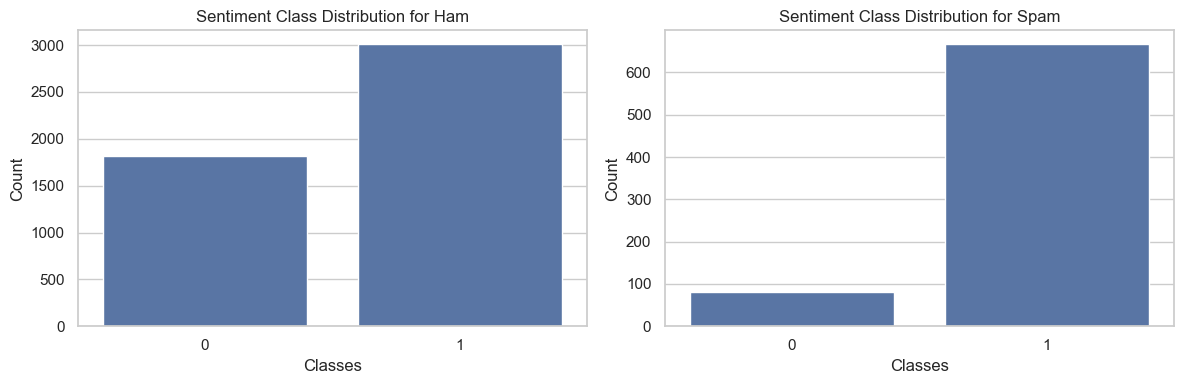

In [24]:
# Set the style
sns.set(style="whitegrid")

# Create a 1x2 subplot layout
plt.figure(figsize=(12, 4))

# Plot for Ham
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="sentiment_label", data=df[df["label"] == 0])
ax1.set_xlabel("Classes")
ax1.set_ylabel("Count")
ax1.set_title("Sentiment Class Distribution for Ham")

# Plot for Spam
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="sentiment_label", data=df[df["label"] == 1])
ax2.set_xlabel("Classes")
ax2.set_ylabel("Count")
ax2.set_title("Sentiment Class Distribution for Spam")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Intermediate tokenisation used for word frequency and visualisation purposes to see the results of our pre-processing

In [25]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['message'].apply(word_tokenize)

Numeric representation of word frequencies in descending order

In [26]:
from itertools import chain
from collections import Counter

vocab_list = list(chain(*df["tokens"].tolist()))
counter = Counter(vocab_list)
counter

Counter({'call': 655,
         'go': 453,
         'get': 451,
         'come': 297,
         'free': 278,
         'ok': 277,
         'ltgt': 276,
         'å£': 275,
         'know': 270,
         'like': 255,
         'day': 255,
         'got': 251,
         'love': 244,
         'want': 243,
         'time': 239,
         'ill': 239,
         'good': 235,
         'text': 225,
         'send': 204,
         'need': 186,
         'one': 180,
         'txt': 176,
         'see': 171,
         'today': 169,
         'think': 166,
         'home': 162,
         'stop': 161,
         'repli': 160,
         'take': 160,
         'lor': 160,
         'tell': 156,
         'sorri': 156,
         'still': 153,
         'back': 152,
         'mobil': 151,
         'make': 147,
         'phone': 142,
         'say': 138,
         'pleas': 136,
         'new': 136,
         'week': 134,
         'work': 134,
         'later': 134,
         'da': 133,
         'well': 133,
         'hi': 133,

Graphical visualisation of word frequencies in the data. In some preprocessing techniques, I observed that words under a threshold length were removed. However, I believed that text messages tend to be informal whether it be spam or ham and abbreviations or shortened words can capture informative results.

<function matplotlib.pyplot.show(close=None, block=None)>

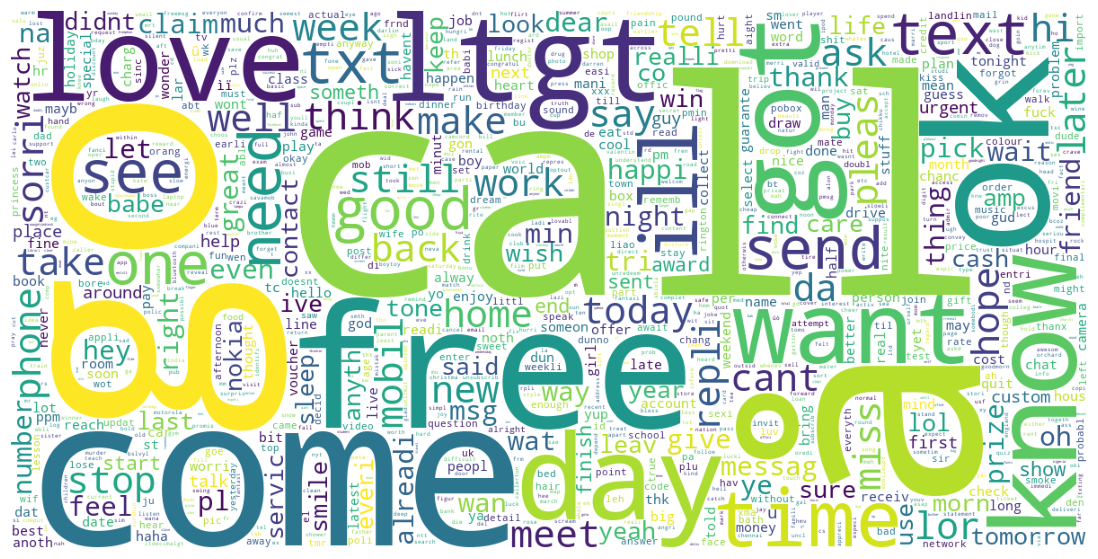

In [27]:
from wordcloud import WordCloud

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(' '.join(vocab_list))

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

Now that we have extracted all our features. We standardise them to ensure features are equally treated.

In [28]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [i for i in df.columns if i not in ["label", "message", "sentiment_label", "tokens", "numbers"]]
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('cleaned_sms.csv', index=False)
df

,label,message,length,word_count,symbols,capitals,numbers,misspelt,sentiment_label,tokens
0,0,go jurong point crazi avail bugi great world l...,0.517399,0.384646,0.363322,-0.360707,0,-1.018602,1,"[go, jurong, point, crazi, avail, bugi, great,..."
1,0,ok lar joke wif oni,-0.856470,-0.841118,2.511001,0.023752,0,-0.065975,1,"[ok, lar, joke, wif, oni]"
2,1,free entri wkli comp win fa cup final tkt st m...,1.254596,1.085083,-0.359960,-0.017036,1,0.994340,1,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,dun say earli hor alreadi say,-0.521380,-0.403345,1.069475,-0.234298,0,-0.065975,1,"[dun, say, earli, hor, alreadi, say]"
4,0,nah think goe usf live around though,-0.320326,-0.228236,-0.461063,-0.307905,0,0.124550,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...,...,...,...,...
5567,1,nd time tri contact å£ pound prize claim easi ...,1.355123,1.260193,-0.172535,-0.096016,1,0.335131,1,"[nd, time, tri, contact, å£, pound, prize, cla..."
5568,0,go esplanad fr home,-0.722434,-0.666009,-0.098031,-0.112944,0,0.696126,0,"[go, esplanad, fr, home]"
5569,0,piti mood soani suggest,-0.387344,-0.490900,1.075587,-0.286813,0,1.153387,1,"[piti, mood, soani, suggest]"
5570,0,guy bitch act like id interest buy someth els ...,0.751962,0.909974,-0.884177,-0.461795,0,-1.263563,1,"[guy, bitch, act, like, id, interest, buy, som..."


For developer purposes

In [29]:
import ast
df = pd.read_csv("cleaned_sms.csv")
tqdm.pandas()
df["tokens"] = df["tokens"].progress_apply(ast.literal_eval)
df

  0%|          | 0/5572 [00:00<?, ?it/s]

,label,message,length,word_count,symbols,capitals,numbers,misspelt,sentiment_label,tokens
0,0,go jurong point crazi avail bugi great world l...,0.517399,0.384646,0.363322,-0.360707,0,-1.018602,1,"[go, jurong, point, crazi, avail, bugi, great,..."
1,0,ok lar joke wif oni,-0.856470,-0.841118,2.511001,0.023752,0,-0.065975,1,"[ok, lar, joke, wif, oni]"
2,1,free entri wkli comp win fa cup final tkt st m...,1.254596,1.085083,-0.359960,-0.017036,1,0.994340,1,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,dun say earli hor alreadi say,-0.521380,-0.403345,1.069475,-0.234298,0,-0.065975,1,"[dun, say, earli, hor, alreadi, say]"
4,0,nah think goe usf live around though,-0.320326,-0.228236,-0.461063,-0.307905,0,0.124550,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...,...,...,...,...
5567,1,nd time tri contact å£ pound prize claim easi ...,1.355123,1.260193,-0.172535,-0.096016,1,0.335131,1,"[nd, time, tri, contact, å£, pound, prize, cla..."
5568,0,go esplanad fr home,-0.722434,-0.666009,-0.098031,-0.112944,0,0.696126,0,"[go, esplanad, fr, home]"
5569,0,piti mood soani suggest,-0.387344,-0.490900,1.075587,-0.286813,0,1.153387,1,"[piti, mood, soani, suggest]"
5570,0,guy bitch act like id interest buy someth els ...,0.751962,0.909974,-0.884177,-0.461795,0,-1.263563,1,"[guy, bitch, act, like, id, interest, buy, som..."


Splitting the data into train and validation set

In [30]:
from sklearn.model_selection import train_test_split

X = df[[i for i in df.columns if i != "label"]]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train

,message,length,word_count,symbols,capitals,numbers,misspelt,sentiment_label,tokens
1642,sleep nt feel well,-0.940242,-1.016228,-1.020737,-0.226502,0,-0.447026,0,"[sleep, nt, feel, well]"
2899,come aftr ltdecimalgt clean hous,-0.420853,-0.490900,0.841452,0.724945,0,1.458228,1,"[come, aftr, ltdecimalgt, clean, hous]"
480,almost see sec,-0.873224,-0.753564,-0.411092,-0.281069,0,-1.590178,1,"[almost, see, sec]"
3485,yeah probabl earlier,-0.806206,-0.928673,-0.487298,-0.321994,0,-0.065975,0,"[yeah, probabl, earlier]"
157,hello love get interview today happi good boy ...,1.288105,1.522857,-0.150925,-0.199740,0,-0.447026,0,"[hello, love, get, interview, today, happi, go..."
...,...,...,...,...,...,...,...,...,...
905,hey charl sorri late repli,-0.521380,-0.578455,-0.324000,-0.421384,0,0.696126,0,"[hey, charl, sorri, late, repli]"
5192,oh oh den muz chang plan liao go back yan jiu,-0.186290,-0.140681,1.205793,-0.209895,0,-0.343103,1,"[oh, oh, den, muz, chang, plan, liao, go, back..."
3980,huh cant thk oredi mani page,-0.420853,-0.228236,-0.710372,-0.441793,0,-0.065975,1,"[huh, cant, thk, oredi, mani, page]"
235,print oh ltgt come upstair,-0.504625,-0.403345,1.027671,-0.241781,0,0.369512,1,"[print, oh, ltgt, come, upstair]"


Building a Word2Vec model using the vocabulary in the training set

Further Text Tokenization and Sequence Padding with Keras


In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_corpus)

tokenized_train = tokenizer.texts_to_sequences(X_train_corpus)
tokenized_test = tokenizer.texts_to_sequences(X_test_corpus)

max_len = X_train["tokens"].apply(lambda x: len(x)).max()
train_x = sequence.pad_sequences(tokenized_train, maxlen = max_len)
test_x = sequence.pad_sequences(tokenized_test, maxlen = max_len)
train_x.shape

(4457, 79)

Creating an embedding matrix (Note: Some words may not be found because we set min_count = 5 for w2v_model)

In [33]:
# Build Embedding Layer
import numpy as np

vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tqdm(tokenizer.word_index.items()):
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


  0%|          | 0/6309 [00:00<?, ?it/s]

(6310, 300)


Creating an embedding layer

In [34]:
from keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

Since we observed previously that there is a class imbalance, we use class weights to balance the classes to preserve integrity of the true results with less bias towards either side

In [35]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


Building our CNN-LSTM model

No support for parameter search for multichannel neural networks

In [36]:
from keras.layers import Lambda, Concatenate
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

# Assuming max_len, embedding_layer, and X_train are defined elsewhere in your code

# Function to build the model
def build_model():
    learning_rate=0.001
    filters=64
    lstm_units=64
    dense_units=64
    dropout_rate=0.5
    combi_input = Input(shape=((2, )), name='combi_input')
    
    # Extract text_input and feature_input using Lambda layers
    text_input = Lambda(lambda x: tf.expand_dims(x[:,0],-1))(combi_input)
    feature_input = Lambda(lambda x: tf.expand_dims(x[:,0],-1))(combi_input)

    # Your model architecture
    embedded_sequences = embedding_layer(text_input)
    conv1D_layer = Conv1D(filters=filters, kernel_size=3, padding='same')(embedded_sequences)
    batch_norm_layer = BatchNormalization()(conv1D_layer)
    activation_layer = Activation('relu')(batch_norm_layer)
    maxpooling_layer = MaxPooling1D(pool_size=2)(activation_layer)
    lstm_layer = LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)(maxpooling_layer)

    merged_layer = Concatenate([lstm_layer, feature_input])
    second_batch_norm_layer = BatchNormalization()(merged_layer)

    dense_layer1 = Dense(dense_units, activation='relu')(second_batch_norm_layer)
    dropout_layer = Dropout(dropout_rate)(dense_layer1)

    output_layer = Dense(1, activation='sigmoid', name='output')(dropout_layer)

    model = Model(inputs=combi_input, outputs=output_layer)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid for random search
param_dist = {
    'epochs': [5, 10, 15],
    'batch_size': [16, 32, 64],
}


# Assuming num_features is the number of additional features
num_features = len([i for i in X_train.columns if i not in ["message", "tokens"]])

# Create a KerasClassifier with your build_model function
model = KerasClassifier(build_fn=build_model, epochs=16, batch_size=32, verbose=1)

# Create a combined input array (combi_input)
combi_input = np.concatenate([train_x, x_train_features], axis=-1)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_result = random_search.fit(combi_input, y_train)

# Print best parameters and results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))



KeyboardInterrupt



In [37]:
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, concatenate, Flatten, BatchNormalization

# Input for text data
text_input = Input(shape=(max_len,), name='text_input')
embedded_sequences = embedding_layer(text_input)


conv1D_layer = Conv1D(filters=64, kernel_size=3, padding='same')(embedded_sequences)
batch_norm_layer = BatchNormalization()(conv1D_layer)
activation_layer = Activation('relu')(batch_norm_layer)
maxpooling_layer = MaxPooling1D(pool_size=2)(activation_layer)
lstm_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(maxpooling_layer)

# Input for additional features
additional_features = [i for i in X_train.columns if i not in ["message", "tokens"]]
num_features = len(additional_features)
x_train_features = X_train[additional_features]
feature_input = Input(shape=(num_features,), name='feature_input')

# Concatenate the LSTM output and feature input
merged_layer = concatenate([lstm_layer, feature_input])
second_batch_norm_layer = BatchNormalization()(merged_layer)

# Dense layers for further processing
dense_layer1 = Dense(64, activation='relu')(second_batch_norm_layer)
dropout_layer = Dropout(0.5)(dense_layer1)

# Output layer
output_layer = Dense(1, activation='sigmoid', name='output')(dropout_layer)

# Create the model
model = Model(inputs=[text_input, feature_input], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 79)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 79, 300)              1893000   ['text_input[0][0]']          
                                                                                                  
 conv1d (Conv1D)             (None, 79, 64)               57664     ['embedding[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 79, 64)               256       ['conv1d[0][0]']              
 Normalization)                                                                               

No features model

In [41]:
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, concatenate, Flatten, BatchNormalization

# Input for text data
text_input = Input(shape=(max_len,), name='text_input')
embedded_sequences = embedding_layer(text_input)


conv1D_layer = Conv1D(filters=64, kernel_size=3, padding='same')(embedded_sequences)
batch_norm_layer = BatchNormalization()(conv1D_layer)
activation_layer = Activation('relu')(batch_norm_layer)
maxpooling_layer = MaxPooling1D(pool_size=2)(activation_layer)
lstm_layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(maxpooling_layer)

# Dense layers for further processing
dense_layer1 = Dense(64, activation='relu')(lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer1)

# Output layer
output_layer = Dense(1, activation='sigmoid', name='output')(dropout_layer)

# Create the model
alt_model = Model(inputs=text_input, outputs=output_layer)

# Compile the model
alt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
alt_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_input (InputLayer)     [(None, 79)]              0         
                                                                 
 embedding (Embedding)       (None, 79, 300)           1893000   
                                                                 
 conv1d_2 (Conv1D)           (None, 79, 64)            57664     
                                                                 
 batch_normalization_3 (Bat  (None, 79, 64)            256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 79, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 39, 64)            0         
 g1D)                                                      

Training the model

In [39]:
%%time
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model
import pickle

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]
try:
    model = load_model('model.h5')
    with open('history_model.pkl', 'rb') as history_file:
        history = pickle.load(history_file)
except:
    history = model.fit([train_x, x_train_features], y_train,
                    batch_size=32,
                    epochs=16,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks,
                    class_weight=class_weight_dict)
    model.save('model.h5')
    with open('history_model.pkl', 'wb') as history_file:
        pickle.dump(history.history, history_file)

c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/16
126/126 [==============================] - 16s 73ms/step - loss: 0.2124 - accuracy: 0.9115 - val_loss: 0.2005 - val_accuracy: 0.9709 - lr: 0.0010
Epoch 2/16
126/126 [==============================] - 9s 75ms/step - loss: 0.1577 - accuracy: 0.9516 - val_loss: 0.1220 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 3/16
126/126 [==============================] - 10s 82ms/step - loss: 0.1377 - accuracy: 0.9539 - val_loss: 0.1003 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 4/16
126/126 [==============================] - 9s 70ms/step - loss: 0.1094 - accuracy: 0.9658 - val_loss: 0.1108 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 5/16
126/126 [==============================] - 9s 75ms/step - loss: 0.1059 - accuracy: 0.9643 - val_loss: 0.0563 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 6/16
126/126 [==============================] - 10s 81ms/step - loss: 0.0935 - accuracy: 0.9708 - val_loss: 0.0891 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 7/16
126/126 [==============================] - 9s 73ms

c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training the no features model

In [42]:
%%time
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]
try:
    alt_model = load_model('alt_model.h5')
    with open('history_alt_model.pkl', 'rb') as history_file:
        history = pickle.load(history_file)
except:
    alt_history = alt_model.fit(train_x, y_train,
                    batch_size=32,
                    epochs=16,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks,
                    class_weight=class_weight_dict)
    alt_model.save('alt_model.h5')
    with open('history_alt_model.pkl', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/16
126/126 [==============================] - 15s 78ms/step - loss: 0.2307 - accuracy: 0.9307 - val_loss: 0.1406 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 2/16
126/126 [==============================] - 8s 64ms/step - loss: 0.1570 - accuracy: 0.9581 - val_loss: 0.0893 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 3/16
126/126 [==============================] - 8s 64ms/step - loss: 0.1397 - accuracy: 0.9601 - val_loss: 0.1028 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 4/16
126/126 [==============================] - 8s 64ms/step - loss: 0.1222 - accuracy: 0.9676 - val_loss: 0.1315 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 5/16
126/126 [==============================] - 8s 66ms/step - loss: 0.1170 - accuracy: 0.9666 - val_loss: 0.1372 - val_accuracy: 0.9417 - lr: 0.0010
Epoch 6/16
126/126 [==============================] - 8s 62ms/step - loss: 0.1057 - accuracy: 0.9721 - val_loss: 0.1222 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 7/16
126/126 [==============================] - 8s 63ms/s

Testing each model

In [43]:
%%time
print("CNN-LSTM with features")
X_test_features = X_test[additional_features]
score = model.evaluate([test_x, X_test_features], y_test, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])
print("\n--------------------------------------------\n")

print("CNN-LSTM without features")
X_test_features = X_test[additional_features]
score = alt_model.evaluate(test_x, y_test, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

CNN-LSTM with features
35/35 [==============================] - 0s 11ms/step - loss: 0.0546 - accuracy: 0.9874

ACCURACY: 0.9874439239501953
LOSS: 0.05458312854170799

--------------------------------------------

CNN-LSTM without features
35/35 [==============================] - 0s 12ms/step - loss: 0.0612 - accuracy: 0.9830

ACCURACY: 0.9829596281051636
LOSS: 0.06123454123735428
CPU times: total: 2.97 s
Wall time: 1.08 s


Training results for both models

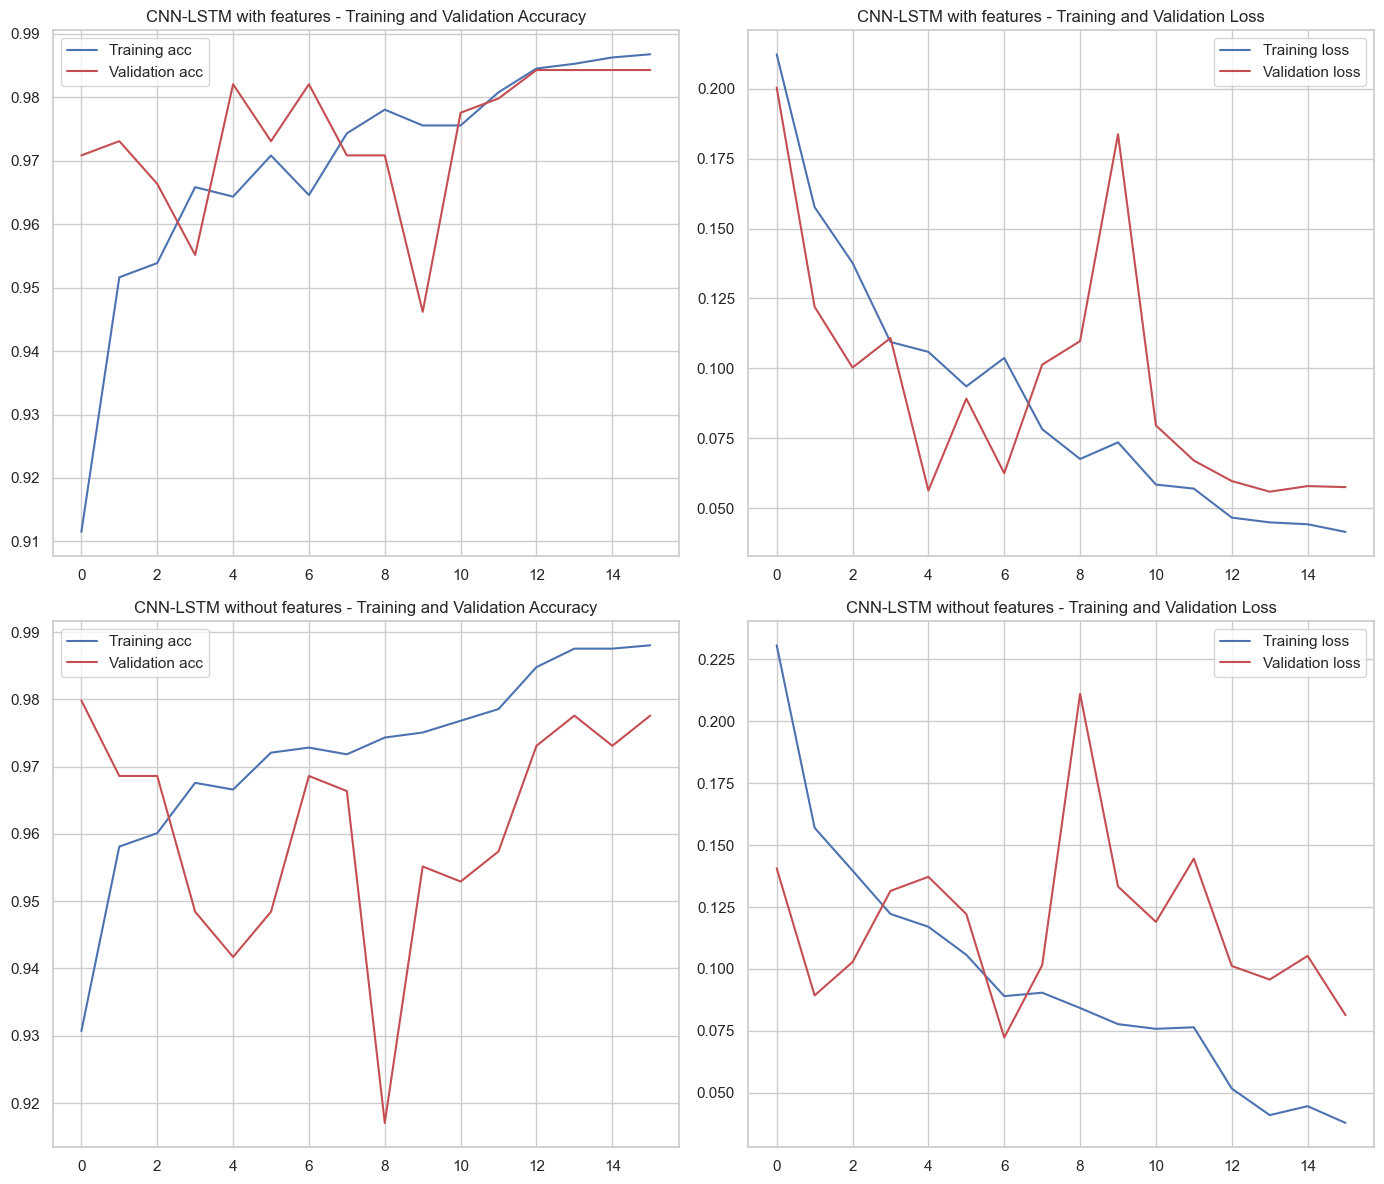

In [44]:
# Assuming 'history' and 'alt_history' are the training histories of your first and second models, respectively

# Plot for the first model
plt.figure(figsize=(14, 12))

# Training and Validation Accuracy
plt.subplot(2, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('CNN-LSTM with features - Training and Validation Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(2, 2, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN-LSTM with features - Training and Validation Loss')
plt.legend()

# Plot for the second model
# Training and Validation Accuracy
plt.subplot(2, 2, 3)
acc = alt_history.history['accuracy']
val_acc = alt_history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('CNN-LSTM without features - Training and Validation Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(2, 2, 4)
loss = alt_history.history['loss']
val_loss = alt_history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN-LSTM without features - Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Testing the metrics of each model

In [45]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

print("CNN-LSTM with features")
y_pred = model.predict([test_x, X_test_features], verbose=1)
model_prob = y_pred
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)
print(classification_report(y_test, y_pred, target_names = ["Ham", "Spam"]))

print("CNN-LSTM without features ")
alt_y_pred = alt_model.predict(test_x, verbose=1)
alt_model_prob = alt_y_pred
threshold = 0.5
alt_y_pred = (alt_y_pred > threshold).astype(int)
print(classification_report(y_test, alt_y_pred, target_names = ["Ham", "Spam"]))

CNN-LSTM with features
35/35 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       976
        Spam       0.96      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

CNN-LSTM without features 
35/35 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       976
        Spam       0.91      0.96      0.93       139

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



DRAW ROC CURVE

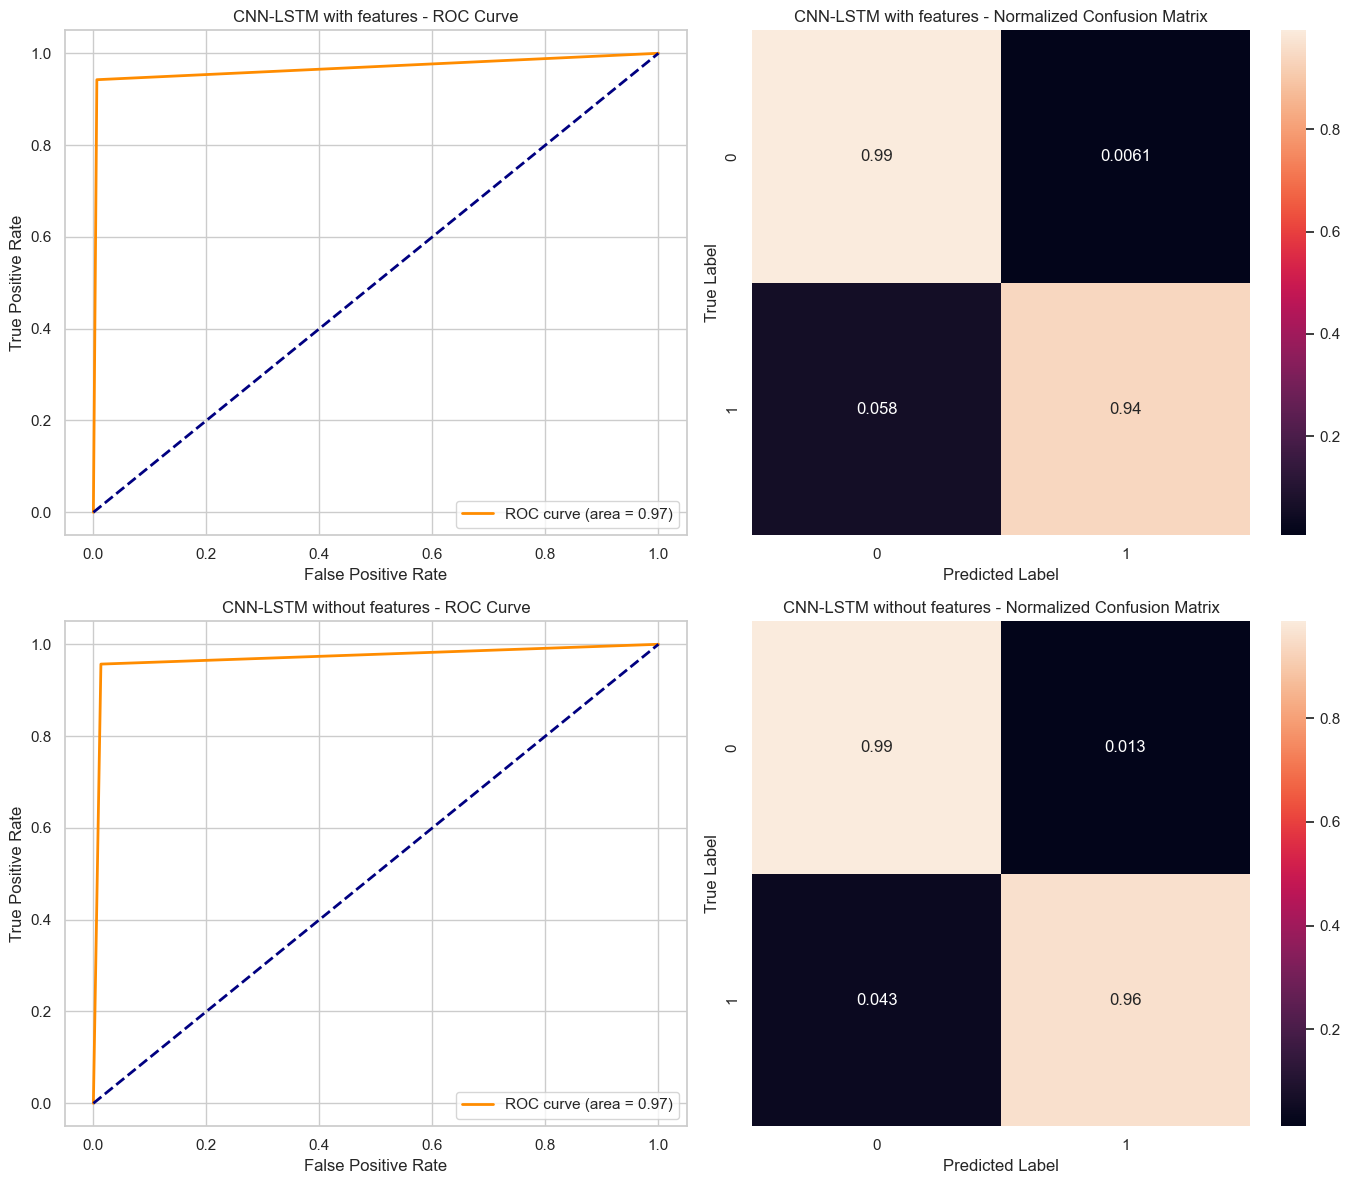

In [46]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test', 'y_pred', and 'alt_y_pred' are your true labels and predicted labels, respectively

# Plot for the first model
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN-LSTM with features - ROC Curve')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized, annot=True)#, fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN-LSTM with features - Normalized Confusion Matrix')

# Plot for the second model
fpr, tpr, _ = roc_curve(y_test, alt_y_pred)
roc_auc = auc(fpr, tpr)

plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN-LSTM without features - ROC Curve')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
conf_mat = confusion_matrix(y_test, alt_y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized, annot=True)#, fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN-LSTM without features - Normalized Confusion Matrix')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Training on out of sample data

In [57]:
def clean_ooc():
    df_test = pd.read_csv("spamraw.csv", encoding='latin-1')
    df_test.drop_duplicates()
    df_test.dropna(how="any", inplace=True, axis=1)
    df_test.columns = ['label', 'message']

    df_test["label"] = df_test["label"].map({"ham": 0, "spam": 1})

    tqdm.pandas(desc='My bar!')
    df_test["length"] = df_test["message"].progress_apply(len)

    tqdm.pandas(desc='My bar!')
    df_test["word_count"] = df_test["message"].progress_apply(count_words)

    tqdm.pandas(desc='My bar!')
    df_test["symbols"] = df_test["message"].progress_apply(count_symbols)

    tqdm.pandas(desc='My bar!')
    df_test["capitals"] = df_test["message"].progress_apply(count_capitals)

    tqdm.pandas(desc='My bar!')
    df_test["message"] = df_test["message"].progress_apply(process_text)

    tqdm.pandas(desc='My bar!')
    df_test['numbers'] = df_test['message'].progress_apply(hasNumber)

    tqdm.pandas(desc='My bar!')
    df_test['message'] = df_test['message'].progress_apply(replace_numbers)

    tqdm.pandas(desc='My bar!')	
    df_test["misspelt"] = df_test["message"].progress_apply(freq_incorrect)

    tqdm.pandas(desc='My bar!')
    df_test["message"] = df_test["message"].progress_apply(stemming)

    tqdm.pandas(desc='My bar!')
    df_test["message"] = df_test["message"].progress_apply(remove_stopwords)

    tqdm.pandas(desc='My bar!')
    df_test["message"] = df_test["message"].progress_apply(length_restrict)

    tqdm.pandas(desc='My bar!')
    df_test["sentiment_label"] = df_test["message"].progress_apply(lambda x: sentiment_label(x, sentiment_pipeline=sentiment_pipeline))

    df_test.to_csv("cleaned_ooc.csv", index=False)
    return df_test
ooc = clean_ooc()

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

My bar!:   0%|          | 0/5559 [00:00<?, ?it/s]

In [62]:
ooc

,type,message,length,word_count,symbols,capitals,numbers,misspelt,tokens,sentiment_label
0,-0.394001,hope good week check,-0.521886,-0.495103,-0.639148,-0.231247,0,-0.042214,"[hope, good, week, check]",0
1,-0.394001,kgive back thank,-0.961110,-1.018185,1.327225,-0.206692,0,0.254983,"[kgive, back, thank]",0
2,-0.394001,also cbe pay,-0.623245,-0.495103,-0.172632,-0.178710,0,-0.636607,"[also, cbe, pay]",0
3,2.538064,complimentari star ibiza holiday â£10000 cash ...,1.184333,0.463879,-0.527297,0.929670,1,0.184222,"[complimentari, star, ibiza, holiday, â£10000,...",1
4,2.538064,okmail dear dave final notic collect tenerif h...,1.370158,0.986961,-0.448854,0.480855,1,0.970456,"[okmail, dear, dave, final, notic, collect, te...",1
...,...,...,...,...,...,...,...,...,...,...
5554,-0.394001,great role model give much realli wish day mir...,2.789191,3.515187,-0.639148,-0.419504,0,-1.018717,"[great, role, model, give, much, realli, wish,...",0
5555,-0.394001,awesom rememb last time got somebodi high firs...,0.136951,0.115158,-0.597701,-0.293286,0,-1.231000,"[awesom, rememb, last, time, got, somebodi, hi...",0
5556,2.538064,prize go anoth custom tc wwwtcbiz 18 150pmin p...,1.099866,1.074141,0.105405,0.155653,1,0.891833,"[prize, go, anoth, custom, tc, wwwtcbiz, 18, 1...",1
5557,2.538064,sm ac jsco energi high may know 2channel 2day ...,1.251906,1.074141,0.040577,0.590238,1,0.679550,"[sm, ac, jsco, energi, high, may, know, 2chann...",0


In [61]:
%%time
def test_ooc(ooc, model, alt_model):
    df_test = ooc
    
    #tqdm.pandas(desc='My bar!')
    #df["sentiment_label"] = df["message"].progress_apply(lambda x: sentiment_label(x, sentiment_pipeline=sentiment_pipeline))

    columns_to_standardize = [i for i in df_test.columns if i not in ["label", "message", "sentiment_label", "tokens", "numbers"]]

    df_test['tokens'] = df_test['message'].apply(word_tokenize)
    df_test[columns_to_standardize] = scaler.fit_transform(df_test[columns_to_standardize])

    X = df_test[[i for i in df_test.columns if i != "type"]]
    X_words = df_test["tokens"]
    y_test = df_test['type']

    w2v_model = models.Word2Vec(vector_size=300, window=3, min_count=5, workers=8)
    w2v_model.build_vocab(X_words)
    words = w2v_model.wv
    vocab_size = len(words)
    print("Vocab size", vocab_size)
    w2v_model.train(X_words,total_examples=len(X_words),epochs=32)

    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(X_words)

    tokenized_train = tokenizer.texts_to_sequences(X_words)

    max_len = X_words.apply(lambda x: len(x)).max()
    test_x = sequence.pad_sequences(tokenized_train, maxlen = max_len)
    print(test_x.shape)
    
    additional_features_test = [i for i in X.columns if i not in ["message", "tokens"]]
    X_features = X[additional_features_test]
    print(X_features.shape)

    print("CNN-LSTM with features")
    score = model.evaluate([test_x, X_features], y_test, batch_size=32)
    print()
    print("ACCURACY:",score[1])
    print("LOSS:",score[0])
    print("\n--------------------------------------------\n")

    print("CNN-LSTM without features")
    score = alt_model.evaluate(test_x, y_test, batch_size=32)
    print()
    print("ACCURACY:",score[1])
    print("LOSS:",score[0])

    print("CNN-LSTM with features")
    y_pred = model.predict([test_x, X_features], verbose=1)
    model_prob = y_pred
    threshold = 0.5
    y_pred = (y_pred > threshold).astype(int)
    print(classification_report(y_test, y_pred, target_names = ["Ham", "Spam"]))

    print("CNN-LSTM without features ")
    alt_y_pred = alt_model.predict(test_x, verbose=1)
    alt_model_prob = alt_y_pred
    threshold = 0.5
    alt_y_pred = (alt_y_pred > threshold).astype(int)
    print(classification_report(y_test, alt_y_pred, target_names = ["Ham", "Spam"]))

    # Assuming 'y_test', 'y_pred', and 'alt_y_pred' are your true labels and predicted labels, respectively

    # Plot for the first model
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(14, 12))

    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CNN-LSTM with features - ROC Curve')
    plt.legend(loc='lower right')

    plt.subplot(2, 2, 2)
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized, annot=True)#, fmt=".2f")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('CNN-LSTM with features - Normalized Confusion Matrix')

    # Plot for the second model
    fpr, tpr, _ = roc_curve(y_test, alt_y_pred)
    roc_auc = auc(fpr, tpr)

    plt.subplot(2, 2, 3)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CNN-LSTM without features - ROC Curve')
    plt.legend(loc='lower right')

    plt.subplot(2, 2, 4)
    conf_mat = confusion_matrix(y_test, alt_y_pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized, annot=True)#, fmt=".2f")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('CNN-LSTM without features - Normalized Confusion Matrix')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    

test_ooc(ooc, model, alt_model)


Vocab size 1548
(5559, 79)
(5559, 7)
CNN-LSTM with features
102/174 [================>.............] - ETA: 1s - loss: -1.1758 - accuracy: 0.0000e+00

InvalidArgumentError: Graph execution error:

Detected at node model/embedding/embedding_lookup defined at (most recent call last):
  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\dtren\AppData\Local\Temp\ipykernel_5268\3611423401.py", line 1, in <module>

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2478, in run_cell_magic

  File "C:\Users\dtren\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\execution.py", line 1330, in time

  File "<timed exec>", line 112, in <module>

  File "<timed exec>", line 37, in test_ooc

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\dtren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py", line 272, in call

indices[15,77] = 6312 is not in [0, 6310)
	 [[{{node model/embedding/embedding_lookup}}]] [Op:__inference_test_function_41649]